# Week 3 - LeNet - CIFAR10 - Deep Learning Lab

Author: Khushee Kapoor

Last Updated: 9/8/22

**Meta-Data** of the dataset:

This is a dataset of 50,000 32x32 color training images and 10,000 test images, labeled over 10 categories.

Each training and test example is assigned to one of the following labels:

- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck

## Setting Up:

To setup, we will import the following libraries:

- NumPy: to analyze the image data
- MatPlotLib: for data visualization
- Seaborn: for data visualization
- TensorFlow: to build neural networks

In [1]:
# importing the libraries
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf

Next, we download the dataset. Since it is available in TensorFlow, we download it directly and split into train and test sets.

In [2]:
# downloading the data
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


Next, we splice the training dataset to obtain the first image and then use the shape attribute to find its dimensions.

In [3]:
# finding the dimensions of the image
x_train[0].shape

(32, 32, 3)

As we can see, each image has dimensions 32x32x3.

To print an image of each class, we loop over the unique classes, and splice the training data using indices obtained from the where() function from the NumPy library which is used to filter and obtain the first index of image belonging to a particular class. To improve the aethetics, we use the title() function from the MatPlotLib library and add a title indicating the class of the image.

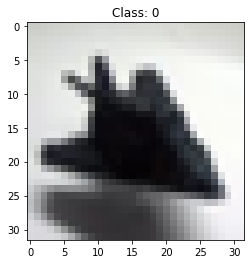

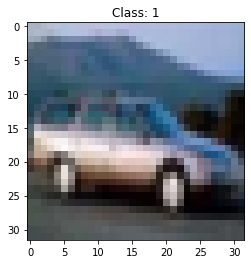

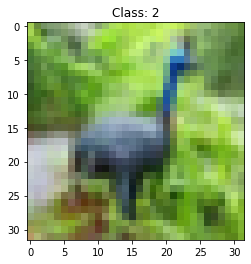

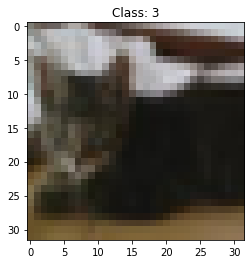

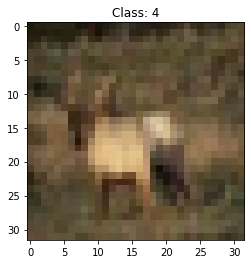

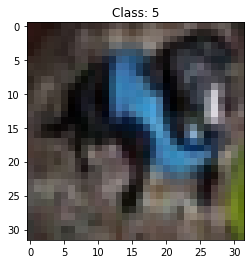

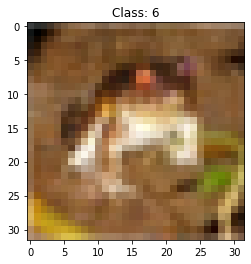

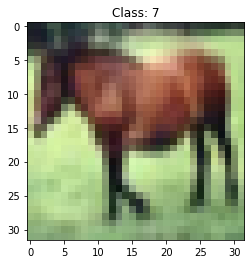

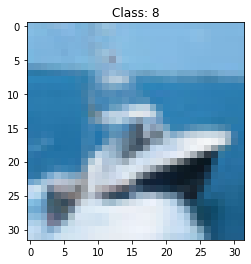

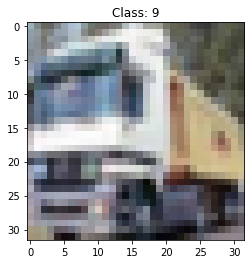

In [4]:
# printing an image from each class
for i in range(0,10):
  plt.figure(i)
  plt.title(str.format('Class: {}', i))
  im = plt.imshow(x_train[np.where(y_train==i)[0][0]])

Next, we divide the training and testing data by 255 to normalize them.

In [5]:
# performing normalization
x_train = x_train/255
x_test = x_test/255

## Le-Net 5 Architecture

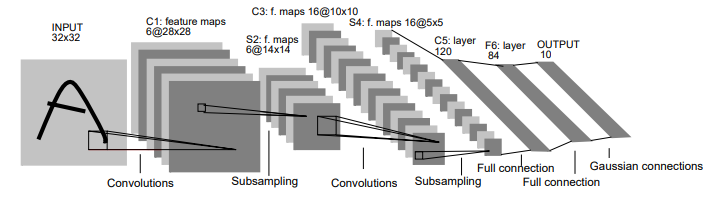

To implement the Le-Net 5 architecture for image classification, we use the Sequential API from the Tensorflow library to initialize the network.

In [6]:
# intializing the network
model = tf.keras.Sequential()

### Layers C1-S2: Input -> Conv2D -> Pooling

The specificatons of the layers are as follows:

- Input: The dimensions of the input layer are 32x32x3 as obtained in the above cells.
- Convolution: 6 filters of size 5x5 with activation 'tanh' and 'valid' padding (to make dimensions=28x28).
- Pooling: Average Pooling of kernel 2x2 with stride 2.


In [7]:
# input layer
model.add(tf.keras.Input((32,32,3)))

# convolution layer
model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5,5), activation='tanh', padding='valid'))

# pooling layer
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

### Layers C3-S4: Conv2D -> Pooling

The specificatons of the layers are as follows:

- Convolution: 16 filters of size 5x5 with activation 'tanh' and 'valid' padding.
- Pooling: Average Pooling of kernel 2x2 with stride 2.

In [8]:
# convolution layer
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='tanh', padding='valid'))

# pooling layer
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides=(2,2)))

### Layers F5-F6-F7: Conv2D -> Fully Connected -> Fully Connected

The specificatons of the layers are as follows:

- Flatten: To convert convolution matrix to fully connected layer.
- Dense: 120 units with 'sigmoid' activation.
- Dense: 84 units with 'sigmoid' activation.
- Dense: 10 units with 'softmax' activation.

In [9]:
# flattening
model.add(tf.keras.layers.Flatten())

# fully connected layer
model.add(tf.keras.layers.Dense(120, activation='sigmoid'))

# fully connected layer
model.add(tf.keras.layers.Dense(84, activation='sigmoid'))

# output layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

### Comparing and Evaluating

Next, we compile the model and set the optimizer to be 'adam', loss to be 'sparse_categorical_crossentropy' and metric to be 'accuracy'. After that, we train the model on the training data with batch size set to 32 (to optimize computation), number of epochs set to 25 (optimum value set after trial and error of various combinations of accuracy and loss) and validation split to be 0.1.

In [10]:
# compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# training the model on the train data
history = model.fit(x_train, y_train, batch_size=32, epochs=25, validation_split=0.1)

Epoch 1/25
1407/1407 [==============================] - 17s 4ms/step - loss: 1.8333 - accuracy: 0.3311 - val_loss: 1.6650 - val_accuracy: 0.3890
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 1.5383 - accuracy: 0.4435 - val_loss: 1.4536 - val_accuracy: 0.4688
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 1.4054 - accuracy: 0.4932 - val_loss: 1.3559 - val_accuracy: 0.5094
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 1.3327 - accuracy: 0.5191 - val_loss: 1.3643 - val_accuracy: 0.5078
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2731 - accuracy: 0.5442 - val_loss: 1.3591 - val_accuracy: 0.5118
Epoch 6/25
1407/1407 [==============================] - 5s 4ms/step - loss: 1.2277 - accuracy: 0.5600 - val_loss: 1.2485 - val_accuracy: 0.5494
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 1.1881 - accuracy: 0.5753 - val_loss: 1.2617 - val_accuracy

Next, we check the number of parameters using the summary() function.

In [11]:
# checking the number of parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

As we can see, there are 62,006 parameters, and all are trainable.

We then compare the training and validation accuracies. To do this, we use the history attribute and extract the accuracies of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

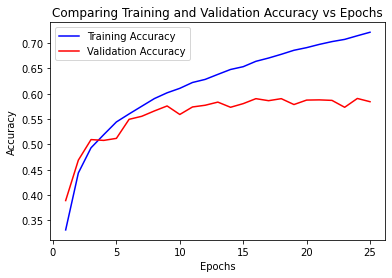

In [12]:
# extracting the model accuracy against epochs
ta = history.history['accuracy']
va = history.history['val_accuracy']
epochs = range(1,26)

# plotting the accuracies
plt.figure()
plt.plot(epochs, ta, 'b', label='Training Accuracy')
plt.plot(epochs, va, 'r', label='Validation Accuracy')
plt.title('Comparing Training and Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

As we can see, there training accuracy increases and then plateaus, whereas the validation accuracy is more or less constant. There is a significant difference between the training and validation accuracies.

Next, we compare the training and validation losses. To do this, we use the history attribute and extract the losses of the models. Next, we plot it against the number of epochs using functions from the MatPlotLib library.

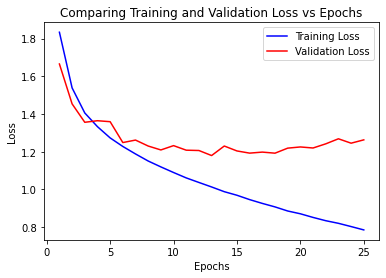

In [13]:
# extracting the model loss against epochs
tl = history.history['loss']
vl = history.history['val_loss']
epochs = range(1,26)

# plotting the losses
plt.figure()
plt.plot(epochs, tl, 'b', label='Training Loss')
plt.plot(epochs, vl, 'r', label='Validation Loss')
plt.title('Comparing Training and Validation Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

As we can see, there training loss is decreasing, whereas the validation loss decreases and then plateaus. There is a signficant diffrence between the training and validation losses.

To evaluate the performance of the model on the test set, we use the evaluate() function and print the model's accuracy on the testing set.

In [14]:
# evaluating the model on the testing set
print(str.format('Accuracy on Test Set: {:.2f}%', model.evaluate(x_test, y_test)[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 1.3096 - accuracy: 0.5707
Accuracy on Test Set: 57.07%


As we can see, the model performs moderately having a testing accuracy of 57.07%.

Next, we use visual aids for model evaluation. To do that, we first obtain the prediction of the network using predict() function on the testing set. We also use the argmax() function from the NumPy library to predict the classes from the probabilities.

In [15]:
# obtaining the predictions
pred = np.argmax(model.predict(x_test), axis=1)

After that, print out the classification_report() for a detailed analysis using functions from the sklearn library.

In [16]:
# printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.59      0.67      0.63      1000
           1       0.63      0.70      0.67      1000
           2       0.46      0.46      0.46      1000
           3       0.40      0.41      0.40      1000
           4       0.55      0.45      0.49      1000
           5       0.49      0.47      0.48      1000
           6       0.62      0.69      0.65      1000
           7       0.63      0.63      0.63      1000
           8       0.67      0.66      0.66      1000
           9       0.65      0.56      0.60      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.57     10000
weighted avg       0.57      0.57      0.57     10000



As we can see, the metrics range between 0.40-0.70, the models performs moderately.

Now, we plot a confusion matrix using the confusion_matrix() function from the sklearn library and the heatmap() function from the Seaborn library. 

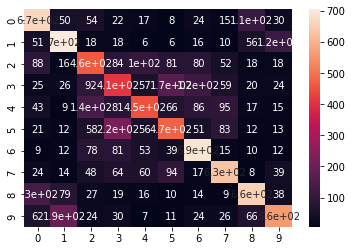

In [17]:
# plotting the confusion matrix
from sklearn.metrics import confusion_matrix 
sns.heatmap(confusion_matrix(y_test, pred), annot=True)

As we can see, there are quite a few values that are out of the diagonal, indicating that the model peforms only moderately and makes many misclassifications.